# This notebook explores implementation of Univariate Linear Regression from Scratch (No Scikit Learn used)

In [17]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset
dataset = np.genfromtxt('datasets/salary-dataset.csv',delimiter=',') 

In [3]:
# view the dataset
dataset

array([[        nan,         nan,         nan],
       [0.00000e+00, 1.20000e+00, 3.93440e+04],
       [1.00000e+00, 1.40000e+00, 4.62060e+04],
       [2.00000e+00, 1.60000e+00, 3.77320e+04],
       [3.00000e+00, 2.10000e+00, 4.35260e+04],
       [4.00000e+00, 2.30000e+00, 3.98920e+04],
       [5.00000e+00, 3.00000e+00, 5.66430e+04],
       [6.00000e+00, 3.10000e+00, 6.01510e+04],
       [7.00000e+00, 3.30000e+00, 5.44460e+04],
       [8.00000e+00, 3.30000e+00, 6.44460e+04],
       [9.00000e+00, 3.80000e+00, 5.71900e+04],
       [1.00000e+01, 4.00000e+00, 6.32190e+04],
       [1.10000e+01, 4.10000e+00, 5.57950e+04],
       [1.20000e+01, 4.10000e+00, 5.69580e+04],
       [1.30000e+01, 4.20000e+00, 5.70820e+04],
       [1.40000e+01, 4.60000e+00, 6.11120e+04],
       [1.50000e+01, 5.00000e+00, 6.79390e+04],
       [1.60000e+01, 5.20000e+00, 6.60300e+04],
       [1.70000e+01, 5.40000e+00, 8.30890e+04],
       [1.80000e+01, 6.00000e+00, 8.13640e+04],
       [1.90000e+01, 6.10000e+00, 9.3941

In [4]:
# we see that the 1st row is of nan values - this is be due to presence of column headers there
# it is important to drop the first row
dataset = dataset[1:,:]
dataset

array([[0.00000e+00, 1.20000e+00, 3.93440e+04],
       [1.00000e+00, 1.40000e+00, 4.62060e+04],
       [2.00000e+00, 1.60000e+00, 3.77320e+04],
       [3.00000e+00, 2.10000e+00, 4.35260e+04],
       [4.00000e+00, 2.30000e+00, 3.98920e+04],
       [5.00000e+00, 3.00000e+00, 5.66430e+04],
       [6.00000e+00, 3.10000e+00, 6.01510e+04],
       [7.00000e+00, 3.30000e+00, 5.44460e+04],
       [8.00000e+00, 3.30000e+00, 6.44460e+04],
       [9.00000e+00, 3.80000e+00, 5.71900e+04],
       [1.00000e+01, 4.00000e+00, 6.32190e+04],
       [1.10000e+01, 4.10000e+00, 5.57950e+04],
       [1.20000e+01, 4.10000e+00, 5.69580e+04],
       [1.30000e+01, 4.20000e+00, 5.70820e+04],
       [1.40000e+01, 4.60000e+00, 6.11120e+04],
       [1.50000e+01, 5.00000e+00, 6.79390e+04],
       [1.60000e+01, 5.20000e+00, 6.60300e+04],
       [1.70000e+01, 5.40000e+00, 8.30890e+04],
       [1.80000e+01, 6.00000e+00, 8.13640e+04],
       [1.90000e+01, 6.10000e+00, 9.39410e+04],
       [2.00000e+01, 6.90000e+00, 9.1739

The dataset used here gives the salaries of various employees of different work experience in years.
<br>1st col is index, 2nd one - years of experience, 3rd one - corresponding salary.
<br>So the 2nd column is our input variable and 3rd col is our target variable.

In [5]:
# drop index
dataset = dataset[:,1:]
dataset

array([[1.20000e+00, 3.93440e+04],
       [1.40000e+00, 4.62060e+04],
       [1.60000e+00, 3.77320e+04],
       [2.10000e+00, 4.35260e+04],
       [2.30000e+00, 3.98920e+04],
       [3.00000e+00, 5.66430e+04],
       [3.10000e+00, 6.01510e+04],
       [3.30000e+00, 5.44460e+04],
       [3.30000e+00, 6.44460e+04],
       [3.80000e+00, 5.71900e+04],
       [4.00000e+00, 6.32190e+04],
       [4.10000e+00, 5.57950e+04],
       [4.10000e+00, 5.69580e+04],
       [4.20000e+00, 5.70820e+04],
       [4.60000e+00, 6.11120e+04],
       [5.00000e+00, 6.79390e+04],
       [5.20000e+00, 6.60300e+04],
       [5.40000e+00, 8.30890e+04],
       [6.00000e+00, 8.13640e+04],
       [6.10000e+00, 9.39410e+04],
       [6.90000e+00, 9.17390e+04],
       [7.20000e+00, 9.82740e+04],
       [8.00000e+00, 1.01303e+05],
       [8.30000e+00, 1.13813e+05],
       [8.80000e+00, 1.09432e+05],
       [9.10000e+00, 1.05583e+05],
       [9.60000e+00, 1.16970e+05],
       [9.70000e+00, 1.12636e+05],
       [1.04000e+01,

In [6]:
# extract tagret variable
Y = dataset[:,1]

In [7]:
Y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [8]:
# form the input matrix
# we need to append a column of 1s to incorporate the bias terms - the resulting matrix will be our input matrix
X = np.append(np.ones((dataset.shape[0],1)),dataset[:,[0]],axis=1)
X

array([[ 1. ,  1.2],
       [ 1. ,  1.4],
       [ 1. ,  1.6],
       [ 1. ,  2.1],
       [ 1. ,  2.3],
       [ 1. ,  3. ],
       [ 1. ,  3.1],
       [ 1. ,  3.3],
       [ 1. ,  3.3],
       [ 1. ,  3.8],
       [ 1. ,  4. ],
       [ 1. ,  4.1],
       [ 1. ,  4.1],
       [ 1. ,  4.2],
       [ 1. ,  4.6],
       [ 1. ,  5. ],
       [ 1. ,  5.2],
       [ 1. ,  5.4],
       [ 1. ,  6. ],
       [ 1. ,  6.1],
       [ 1. ,  6.9],
       [ 1. ,  7.2],
       [ 1. ,  8. ],
       [ 1. ,  8.3],
       [ 1. ,  8.8],
       [ 1. ,  9.1],
       [ 1. ,  9.6],
       [ 1. ,  9.7],
       [ 1. , 10.4],
       [ 1. , 10.6]])

We now have the input and output matrix, labelled as X and Y.<br>
We know by mathematics of Linear Regression, the weight matrix is given by:<br>
<br>
$\mathbf{W} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}$


In [9]:
# Implement the above equation to obtain optimal weights
W = (np.linalg.inv(X.T @ X)) @ (X.T @ Y)
W

array([24848.20396652,  9449.96232146])

In [10]:
print("Bias term (W0):", W[0])
print("Weight for the feature (W1):", W[1])

Bias term (W0): 24848.203966523182
Weight for the feature (W1): 9449.962321455083


A basic Linear Regression model is now ready.<br>
Multiplying the matrices W and a new_input results in a prediction of salary.

In [11]:
# prediction for a new input
new_input = np.array([[1, 9.6]])  # Example: 9.6 years of experience
predicted_salary = new_input @ W

In [12]:
print("Predicted Salary for 9.6 years of experience:", predicted_salary[0])

Predicted Salary for 9.6 years of experience: 115567.84225249197


In [13]:
# prediction for other inputs
[1,17] @ W # prediction for 17 years of experience

np.float64(185497.5634312596)

In [14]:
[1,1]@W # prediction for 1 year of experience

np.float64(34298.16628797827)

In [18]:
[1,0] @ W # prediction for 0 years of experience - this would be equivalent to the bias term

np.float64(24848.203966523182)

Since we have built a regression line, it would be nice to plot the line using matplotlib.

In [39]:
# form the linear equation using weight matrix
bias = W[0]
slope = W[1]
Y_pred = bias*X[:,0] + slope*X[:,1]

In [41]:
Y_pred

array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

Text(0.5, 1.0, 'Univariate Regression Fit')

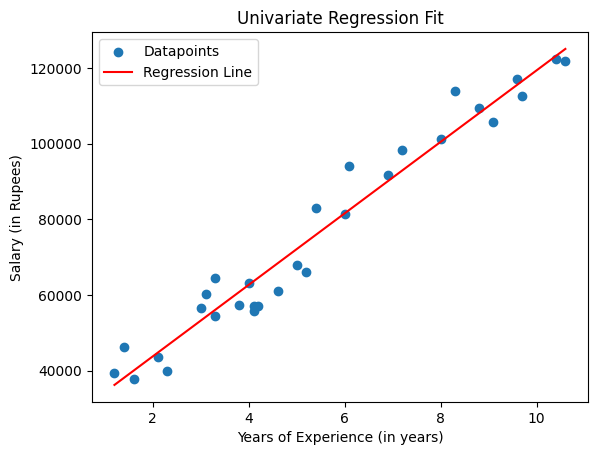

In [48]:
# plot a scatter plot of original data
plt.scatter(X[:,1],Y,label='Datapoints')

# plot the regression line
plt.plot(X[:,1],Y_pred,color='red',label='Regression Line')
plt.legend()
plt.xlabel('Years of Experience (in years)')
plt.ylabel('Salary (in Rupees)')
plt.title('Univariate Regression Fit')